In [2]:
from src.utils import load_json, save_json
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices=False
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D
import io
from PIL import Image
from collections import defaultdict
import pandas as pd

/home/stef/bottle/notebooks


In [3]:
min_rule_path = "../data/rules/minimal1224_all_uniprot.tsv"
rules = pd.read_csv(min_rule_path, sep='\t')
rules.head(50)

,Name,Reactants,SMARTS,Products,Comments
0,rule0001,Any;Any,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],Any;Any,A0A060PLD9;A0A0P0YNP7;A0A0P9RZM9;A1XCQ0;A3E242...
1,rule0002,Any;NAD_CoF,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,NADH_CoF;Any,A0A023RBJ1;A0A060KZ16;A0A060TBM3;A0A072UJB3;A0...
2,rule0003,NADH_CoF;Any,[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[...,Any;NAD_CoF,A0A023RBJ1;A0A060KZ16;A0A060TBM3;A0A072UJB3;A0...
3,rule0004,Any;NADH_CoF;O2,[#6:1].[#6:2]1=[#6:3]-[#7:4]-[#6:5]=[#6:6]-[#6...,Any;NAD_CoF;WATER,A0A1P8W705;A0A250DUW2;A1Z745;A5HMH6;A5HMH7;A5H...
4,rule0005,Any;NAD_CoF;WATER,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,Any;NADH_CoF;O2,A0A1P8W705;A0A250DUW2;A1Z745;A5HMH6;A5HMH7;A5H...
5,rule0006,Any;Any,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],Any;WATER,A0A023J5W7;A0A023MIF8;A0A024FS29;A0A024FSF5;A0...
6,rule0007,Any;WATER,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],Any;Any,A0A023J5W7;A0A023MIF8;A0A024FS29;A0A024FSF5;A0...
7,rule0008,Any;GLUCOSYL_ACCEPTOR_CoF,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],GLUCOSYL_DONOR_CoF;Any,A0A023NFQ4;A0A023NGA8;A0A059ZV61;A0A0B5WYD4;A0...
8,rule0009,GLUCOSYL_DONOR_CoF;Any,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],Any;GLUCOSYL_ACCEPTOR_CoF,A0A023NFQ4;A0A023NGA8;A0A059ZV61;A0A0B5WYD4;A0...
9,rule0010,METHYL_ACCEPTOR_CoF;Any,[#16:1].[#6:2]-[#8:3]>>[#6:2]-[#16+:1].[#8:3],METHYL_DONOR_CoF;Any,A0A075W3C7;A0A075W3Z0;A0A088B191;A0A0K1YW34;A3...


[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7+:7]:[#6:8]:1>>[#6:3]1=[#6:8]-[#7+0:7]-[#6:6]=[#6:5]-[#6:4]-1.[#6:1]=[#8:2]


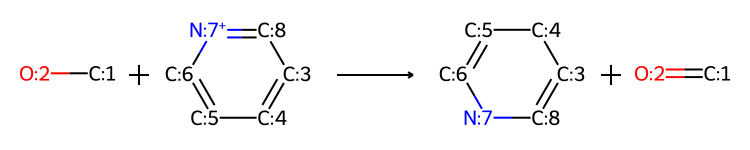

In [4]:
smarts = rules.loc[1, 'SMARTS']
print(smarts)
AllChem.ReactionFromSmarts(smarts, useSmiles=True)

[#6:1]-[#7:2].[#6:3]=[#8:4]>>[#6:3]-[#7:2].[#6:1]=[#8:4]


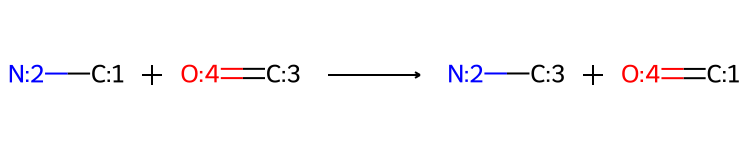

In [5]:
smarts = rules.loc[29, 'SMARTS']
print(smarts)
AllChem.ReactionFromSmarts(smarts, useSmiles=True)

In [27]:
# Pull all crbonyl involving rules

key = 'CARBONYL_CoF'
carbonyl_rules = rules.loc[rules['Reactants'].str.contains(key)]
carbonyl_rules.head()


,Name,Reactants,SMARTS,Products,Comments
29,rule0030,Any;CARBONYL_CoF,[#6:1]-[#7:2].[#6:3]=[#8:4]>>[#6:3]-[#7:2].[#6...,AMINO_CoF;Any,A0A060PQX5;A0A078FCE5;A0A078HJ76;A0A078HPK5;A0...
742,rule0743,CARBONYL_CoF;Any,[#6:1].[#6:2]-[#8:3]>>[#6:2].[#6:1]-[#8:3],AMINO_CoF;Any,NaN
743,rule0744,CARBONYL_CoF;Any,[#6:1]=[#8:2].[#7:3]-[#6:4]-[#6:5]-[#8:6]>>[#6...,AMINO_CoF;Any;CO2,NaN
787,rule0788,Any;NADH_CoF;CARBONYL_CoF,[#6:1]-[#7:2].[#6:3]1=[#6:4]-[#7:5]-[#6:6]=[#6...,AMINO_CoF;Any;NAD_CoF,A0A171;B3FYT6;B9FLJ1;C4LUA1;C8KIP3;O26308;O293...
884,rule0885,Any;CARBONYL_CoF;H2O2,[#6:1]-[#7:2].[#6:3]=[#8:4].[#8:5]-[#8:6]>>[#6...,AMINO_CoF;Any;O2,NaN


In [20]:
# Load known reaction dict


krs = load_json("../data/mapping/known_rxns_swissprot_enzymes_240310_v2.json")


dict_keys(['smarts', 'imt_rules', 'min_rules', 'enzymes', 'db_entries', 'reverse', 'rcs'])


In [24]:
# Get reactions mapped by carbonyl involinvg rules

print(krs['R04048637b6a63edd6c91da40d021e917a7fcb4349a991c4f7e69154a46cba897'].keys())
kr = krs['R04048637b6a63edd6c91da40d021e917a7fcb4349a991c4f7e69154a46cba897']
kr_min_rules = kr['min_rules']
db_entries = kr['db_entries']
print(db_entries)
kr


dict_keys(['smarts', 'imt_rules', 'min_rules', 'enzymes', 'db_entries', 'reverse', 'rcs'])
[['rhea', 40408], ['rhea', 40409]]


{'smarts': 'CCCCCCCCC=CCCCCCCCC(=O)OC(COCCCCCCCCCCCCCCCC)COP(=O)(O)O.Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)O)C(O)C1O>>CCCCCCCCC=CCCCCCCCC(=O)OC(CO)COCCCCCCCCCCCCCCCC.Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O',
 'imt_rules': ['rule0014_23'],
 'min_rules': ['rule0014'],
 'enzymes': [['P20192',
   'MSKERGLISPSDFAQLQKYMEYSTKKVSDVLKLFEDGEMAEYLQGDAIGYEGFQQFLKIYLEVDSVPSHLSLALFQSFQTSYCSEETVKRDVVCLSDVSCYFSLLEGGRPEDKLEFTFKLYDTDRNGILDSSEVDRIIIQMMRMAEYLDWDVSELRPILQEMMKEIDYDGSGSVSLAEWLRAGATTVPLLVLLGLEMTLKDNGQHMWRPKRFPRPVYCNLCESSIGLGKQGLSCNLCKYTVHDQCAMKALPCEVSTYAKSRKDIGVQTHVWVRGGCESGRCDRCQKKIRIYHSLVGLHCVWCHLEIHDDCLPAMGHECDCGLLRDHILPPSSIYPSVLASGQERKVSKTSQKTTDDLNLSTSEALRIDPVSNTHPLLVFVNPKSGGKQGERVLWKFQYLLNPRQVFNLLKDGPEPGLRFFREVPDYRILVCGGDGTVGWILETIDKANLPFVPPVAVLPLGTGNDLARCLRWGGGYEGQNLGKILKDLEASKVVHMDRWSVEVIPQQTEEKSDPVPFQIINNYFSIGVDASIAHRFHIMREKYPEKFNSRMKNKLWYFEFATSESIFSTCKKLEESLTVEICGKPLDLSNLSLEGIAVLNIPSTHGGSNLWGDTKRPHGDIHGINQALGAMAKVITDPDILKTCVPDLSDKRLEVVGLEGAIEMGQIYTKLKNAGHRLAKCSEITFHT

In [25]:
import pandas as pd

# Example DataFrame
data = {'A': ['apple', 'banana', 'orange', 'pineapple', 'grapefruit'],
        'B': [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

# Define the substring you want to search for
substring = 'apple'

# Using .loc to filter rows where column 'A' contains the substring
filtered_df = df.loc[df['A'].str.contains(substring)]

print(filtered_df)


           A  B
0      apple  1
3  pineapple  4
